In [23]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


In [14]:
with open('final/data.json', 'r') as file:
    data = json.load(file)

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate over each company in the JSON data
for company, company_data in data.items():
    print("company", company)
    # Extract the desired values from the nested dictionaries
    mda_positive = company_data['2022']['mda']['avg_positive']
    mda_negative = company_data['2022']['mda']['avg_negative']
    mda_neutral = company_data['2022']['mda']['avg_neutral']
    risk_positive = company_data['2022']['risks']['avg_positive']
    risk_negative = company_data['2022']['risks']['avg_negative']
    risk_neutral = company_data['2022']['risks']['avg_neutral']
    stock_return = company_data['2022']['stock_return']
    
    # Create a dictionary with the values
    company_dict = {
        'mda_positive': mda_positive,
        'mda_negative': mda_negative,
        'mda_neutral': mda_neutral,
        'risk_positive': risk_positive,
        'risk_negative': risk_negative,
        'risk_neutral': risk_neutral,
        'stock_return': stock_return
    }
    
    # Add the dictionary as a row to the DataFrame
    df = pd.concat([df, pd.DataFrame(company_dict, index=[company])])


# Print the DataFrame
df

company AAPL
company CVX
company BRK
company ABT
company AMZN
company ABBV
company AVGO
company COST
company GOOG
company BAC
company MRK
company MSFT
company KO
company MCD
company META
company HD
company JPM
company JNJ
company LLY
company NVDA
company TSLA
company PG
company XOM
company PFE
company V
company PEP
company UNH
company TMO
company WMT


,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return
AAPL,0.922344,0.021101,0.056555,0.849809,0.020332,0.129858,-0.044337
CVX,0.946681,0.020833,0.032485,0.752186,0.021880,0.225935,0.013782
BRK,0.918771,0.026647,0.054581,0.863118,0.015599,0.121283,0.027728
ABT,0.756195,0.013546,0.230259,0.724898,0.021750,0.253352,-0.052979
AMZN,0.858847,0.021245,0.119908,0.837402,0.019851,0.142747,-0.135506
ABBV,0.819775,0.030891,0.149334,0.799627,0.031775,0.168598,0.021267
AVGO,0.854081,0.013698,0.132221,0.858743,0.015619,0.125638,-0.009982
COST,0.757271,0.024414,0.218315,0.779952,0.035218,0.184830,-0.040627
GOOG,0.820135,0.061711,0.118153,0.820178,0.015802,0.164021,-0.128125
BAC,0.821909,0.027249,0.150842,0.786673,0.018113,0.195214,-0.011008


In [17]:
# calcualte z score

mean_stock_return = df['stock_return'].mean()
std_stock_return = df['stock_return'].std()
df['z-score-stock-return'] = (df['stock_return'] - mean_stock_return) / std_stock_return

# Print the updated DataFrame
print(mean_stock_return)
print(std_stock_return)

-0.0012954862413793091
0.06328816444012679


In [32]:
def plot(x, y):
    # MDA positive vs. stock return
    # Create a scatter plot
    plt.scatter(df[x], df[y])

    # Fit a polynomial regression line (line of best fit)
    degree = 1  # Degree of the polynomial regression line (1 for linear regression)
    coefficients = np.polyfit(df[x], df[y], degree)
    line_of_best_fit = np.polyval(coefficients, df[x])
    plt.plot(df[x], line_of_best_fit, color='r', label='Line of Best Fit')

    # Add labels for each point
    for i, ticker in enumerate(df.index):
        plt.annotate(ticker, (df[x].iloc[i], df[y].iloc[i]))

    # Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot with Line of Best Fit: {x} vs. {y}')
    plt.legend()

    # Calculate evaluation metrics
    predicted_values = np.polyval(coefficients, df[x])
    r2 = r2_score(df[y], predicted_values)
    adjusted_r2 = 1 - (1 - r2) * (len(df) - 1) / (len(df) - degree - 1)
    mse = mean_squared_error(df[y], predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(df[y], predicted_values)

    # Print the evaluation metrics
    print("R-squared:", r2)
    print("Adjusted R-squared:", adjusted_r2)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)

    # Show the plot
    plt.show()

R-squared: 0.04557143044538592
Adjusted R-squared: 0.01022222416558538
Mean Squared Error (MSE): 0.9215172395699722
Root Mean Squared Error (RMSE): 0.9599568946416147
Mean Absolute Error (MAE): 0.5966395246814852


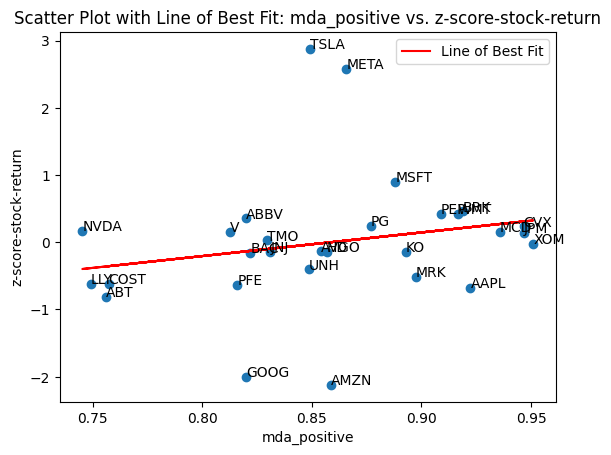

In [33]:
plot('mda_positive', 'z-score-stock-return')


R-squared: 0.02009196882187425
Adjusted R-squared: -0.01620092122175998
Mean Squared Error (MSE): 0.9461180990685352
Root Mean Squared Error (RMSE): 0.9726860228606841
Mean Absolute Error (MAE): 0.6516406567302758


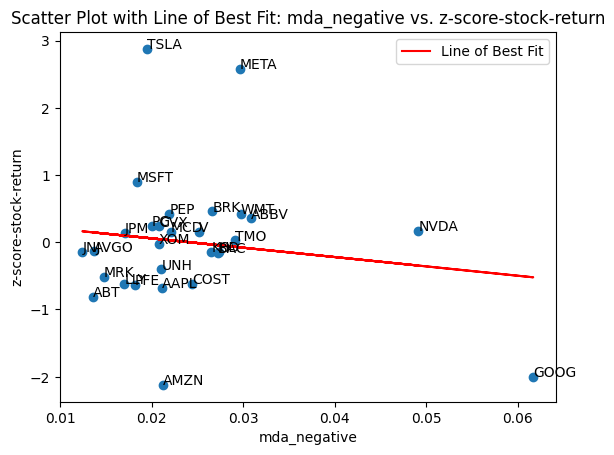

In [34]:
plot('mda_negative', 'z-score-stock-return')

R-squared: 0.03784745357586217
Adjusted R-squared: 0.0022121740786718025
Mean Squared Error (MSE): 0.9289748724095124
Root Mean Squared Error (RMSE): 0.9638334256548236
Mean Absolute Error (MAE): 0.5886918887695871


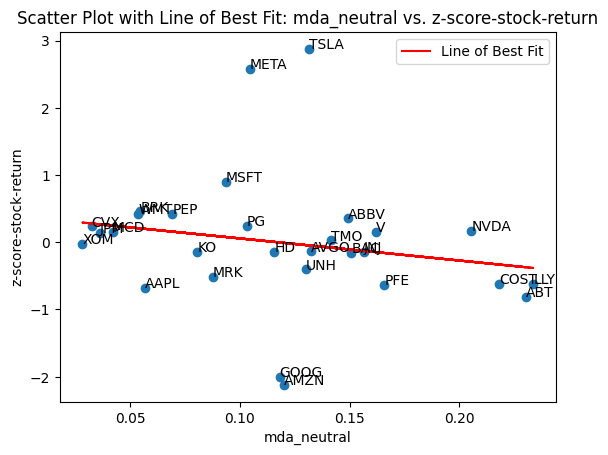

In [35]:
plot('mda_neutral', 'z-score-stock-return')

R-squared: 0.009640740226363631
Adjusted R-squared: -0.027039232357845222
Mean Squared Error (MSE): 0.9562089404710972
Root Mean Squared Error (RMSE): 0.9778593664076124
Mean Absolute Error (MAE): 0.6221323892803757


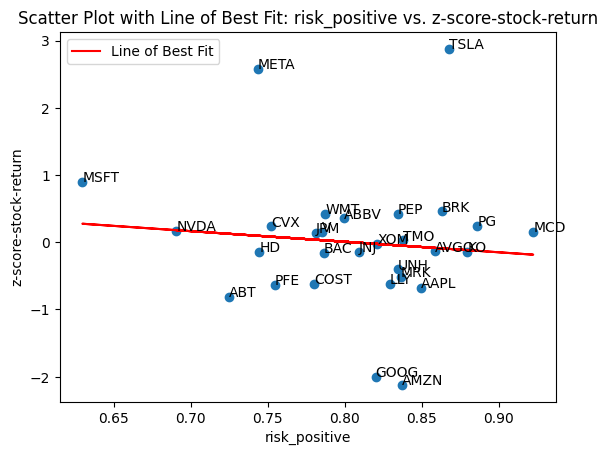

In [36]:
plot('risk_positive', 'z-score-stock-return')

R-squared: 0.11618033726993049
Adjusted R-squared: 0.08344627568733542
Mean Squared Error (MSE): 0.8533431226359292
Root Mean Squared Error (RMSE): 0.9237657293036634
Mean Absolute Error (MAE): 0.6057636437936919


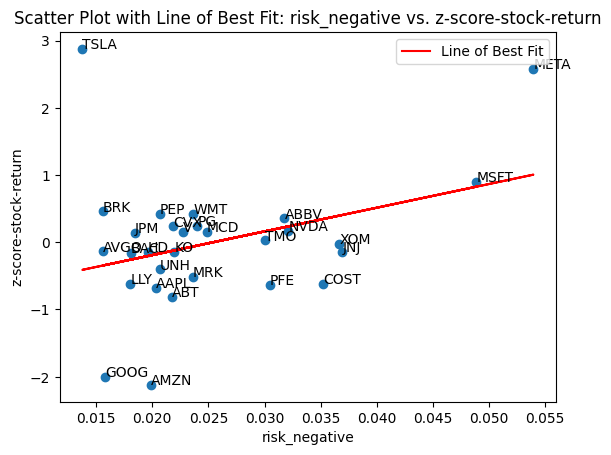

In [37]:
plot('risk_negative', 'z-score-stock-return')

R-squared: 0.002397745351515046
Adjusted R-squared: -0.03455048630213242
Mean Squared Error (MSE): 0.9632021769019855
Root Mean Squared Error (RMSE): 0.981428640758963
Mean Absolute Error (MAE): 0.6274567250137071


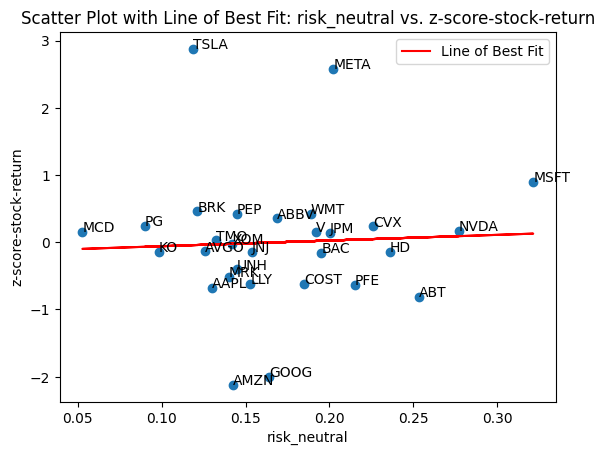

In [38]:
plot('risk_neutral', 'z-score-stock-return')